качаем библиотеки

In [39]:
import pandas as pd
import numpy as np

import statistics
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from scipy.stats import t

Note: you may need to restart the kernel to use updated packages.


#### Проект
Наша кампания ранне имела всего один продукт, он был запущен давно. У нас есть записи сколько выручки нам приносил этот продукт за каждый день его работы. Пару месяцев назад кампания запустила второй продукт, и так же ежедневно фиксировала выручку которую он нам приносил. Данные по выручкам сохранены ниже в переменных product1 и product2.<br>
Наша задача сделать полный анализ на основе всего лишь этих двух списках.

In [4]:
### для загрузки данных
with open(r'project.txt', 'r') as fp:
    for i, line in enumerate(fp):
        if i == 0:
            product1 = [int(i) for i in line.split(' ')]
        if i == 1:
            product2 = [int(i) for i in line.split(' ')]

fp.close()

**Задача 1**<br>
подсчитайте среднее арифметическое (mean), медиану и моду для обоих списков: product1 и product2

In [6]:
mean_product1 = np.mean(product1)
median_product1 = np.median(product1)
mode_product1 = statistics.mode(product1)

mean_product2 = np.mean(product2)
median_product2 = np.median(product2)
mode_product2= statistics.mode(product2)

Какая из трех метрик будет наименее показательной, и почему?<br>
На основе оставшихся двух метрик какой продукт в среднем приносит больше выручки?

In [7]:
print(mean_product1)
print(median_product1)
print(mode_product1)

print(mean_product2)
print(median_product2)
print(mode_product2)

199.103
198.5
186
193.5
194.5
227


Судя по данным первый продукт приносить больше выручки, но в по мода второй продукт часще встречается.

**Задача 2**<br>
подсчитайте стандартное отклонение и скажите оценка какого продукта является более точной?

In [9]:
std_product1 = np.std(product1)
std_product2 = np.std(product2)
print(std_protuct1, std_product2)


28.793964489107783 29.589018233121557


У первого продукта стандартное отклонение ниже чем у второго. Значит первая выручка менее подвежена колебаниям чем со вторым.
Оценка у первого продукта является более точной и стабильной

**Задача 3**<br>
Нарисуйте распределение вероятности выручки для продукта1 и для продукта2.<br>
Можете использовать гистограмму или kdeplot

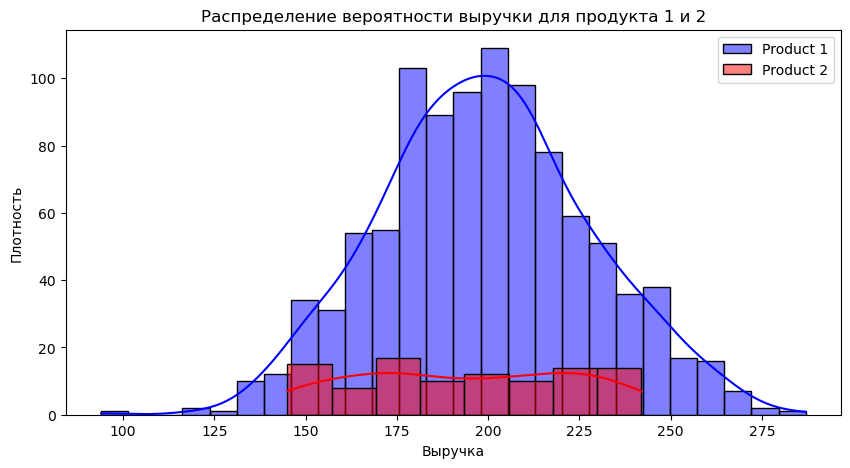

In [22]:
plt.figure(figsize=(10, 5))
sns.histplot(product1, kde=True, color='blue', label='Product 1')
sns.histplot(product2, kde=True, color='red', label='Product 2')
plt.legend()
plt.title("Распределение вероятности выручки для продукта 1 и 2")
plt.xlabel("Выручка")
plt.ylabel("Плотность")
plt.show()

**Задача 4**<br>
Посчитайте размах выручки для продукта1 и для продукта2<br>
Сходится ли разница в размахах и разница в стандартных отклонениях, какая может быть причина?

In [23]:
range_product1 = max(product1) - min(product1)
range_product2 = max(product2) - min(product2)
print(f"Размах выручки первого продукта: {range_product1}")
print(f"Размах выручки второго продукта: {range_product1}")

Размах выручки первого продукта: 193
Размах выручки второго продукта: 193


**Задача 5**<br>
Посчитайте межквартильный разммах IQR для продукта1 и продукта2<br>
Теперь убрав выбросы что мы можем сказать о разбросе данных?

In [24]:
iqr_product1 = np.percentile(product1, 75) - np.percentile(product1, 25)
iqr_product2 = np.percentile(product2, 75) - np.percentile(product2, 25)
print(f"IQR 1 продукта: {iqr_product1}")
print(f"IQR 2 продукта: {iqr_product2}")

IQR 1 продукта: 38.25
IQR 2 продукта: 51.0


Больший IQR для продукта 2 говорит о том, что данные для продукта 2 более разбросаны в центральной части, чем данные для продукта 1.

**Задача 6**<br>
Нарисуйте box-plot для продукта1 и с рисунка скажите при каких значениях начинаются выбросы

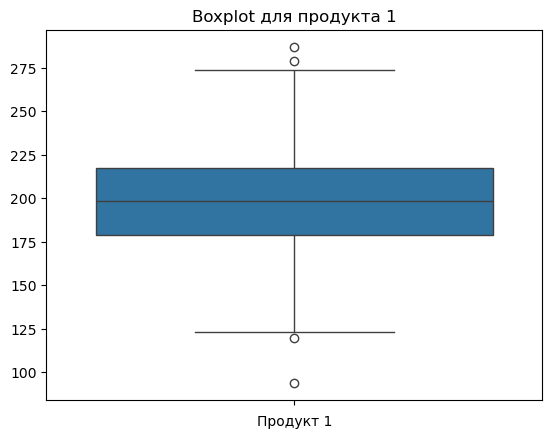

In [15]:
sns.boxplot(data=product1)
plt.title("Boxplot для продукта 1")
plt.xlabel("Продукт 1")
plt.show()

Верхние выбросы начинаются примерно от значения около 275 и выше.
Нижние выбросы начинаются примерно от значения около 125 и ниже.

**Задача 7**<br>
Нарисуйте QQ plot выручки для обоих продуктов<br>
Какое из распределений является нормальным?

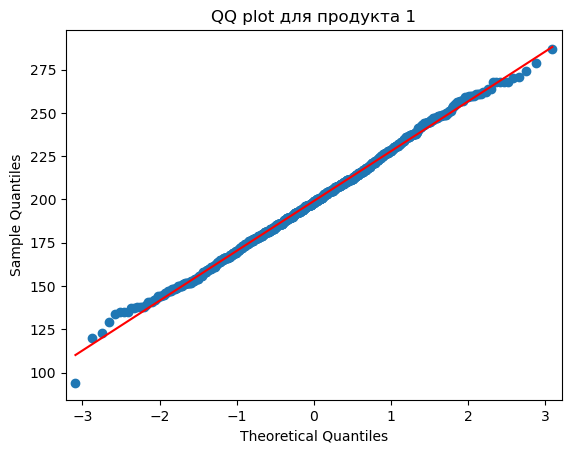

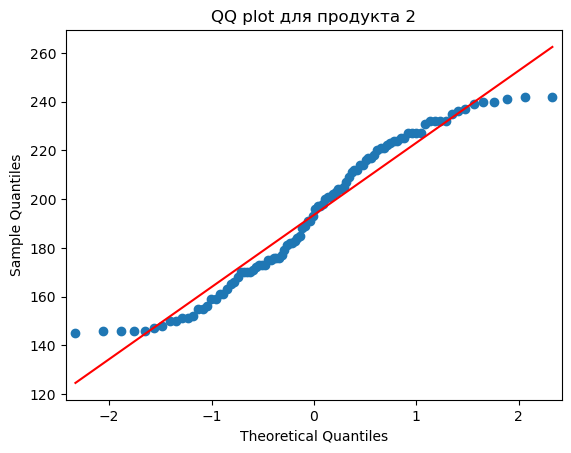

In [16]:
sm.qqplot(np.array(product1), line='s')
plt.title("QQ plot для продукта 1")
plt.show()

sm.qqplot(np.array(product2), line='s')
plt.title("QQ plot для продукта 2")
plt.show()

Каких значений много или наоборот не достает в продукте2 чтобы значения стали нормально распределенными?

На графике видно, что в середине точки сгруппированы ближе к линии, чем крайние значения. Это указывает на избыток значений около средней части (вокруг 0 на теоретической оси квантилей).
Сокращение количества значений в центре распределения или добавление значений в хвостах также может помочь приблизить распределение к нормальному.

**Задача 8**<br>
И так мы знаем что выручка продукта1 является нормально распредленной, переведите все значения в стандартное нормальное распределение используя текущие mean и std<br>
создайте новую переменнуя и запишите новые значения туда

In [17]:
product1_standardized = (product1 - mean_product1) / std_product1

Нарисуйте kdeplot нового стандартного распределения

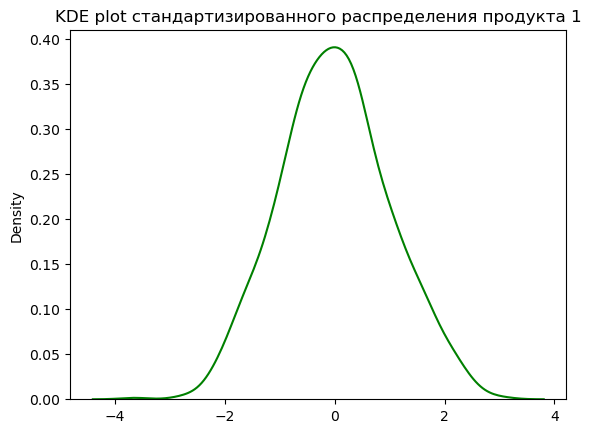

In [18]:
sns.kdeplot(product1_standardized, color='green')
plt.title("KDE plot стандартизированного распределения продукта 1")
plt.show()

**Задача 9**<br>
Подсчитайте точку слева от которой будет 1% всей вероятности распределения

In [19]:
percentile_1 = norm.ppf(0.01)

In [32]:
percentile_1

-2.3263478740408408

**Задача 10**<br>
Продукт2 новый, но уже достаточно стабилизирвался за эти месяцы. Мы хотим знать сколько он будет в среднем нам приносить ежедневно выручки и в будущем.<br>
Дайте точечную оценку средней выручке продукта2

In [33]:
mean_product2 = np.mean(product2)  
ci_product2 = stats.t.interval(0.95, len(product2) - 1, loc=mean_product2, scale=stats.sem(product2))
print(mean_product2)
print(ci_product2)

193.5
(187.59931931126806, 199.40068068873194)


Подсчитайте 95% доверительный интервал

In [34]:
print(f'95%-й доверительный интервал для этой средней выручки, который составляет{ci_product2}')

95%-й доверительный интервал для этой средней выручки, который составляет(187.59931931126806, 199.40068068873194)


**Задача11**<br>
Проведите АБ тест с уровнем значимости 5% что средняя выручка у продукта1 выше чем 197.5

In [36]:
from scipy.stats import ttest_1samp

In [37]:
t_stat, p_value = ttest_1samp(product1, 197.5)
print(t_stat)
print(p_value)

1.7596034376105127
0.07878111924868997


Какой это был типа АБ теста?

Одновыборочный t-test

**Задача12**<br>
Проведите АБ тест с уровнем значимости 5% что средняя выручка у продукта1 и у продукта2 равны

In [41]:
from scipy.stats import ttest_ind

In [44]:
t_stat, p_val = ttest_ind(product1, product2)
t_stat, p_val

(1.8489503287555282, 0.06473365137046305)

Так как p-значение (0.0647) больше уровня значимости (0.05), мы не можем отвергнуть нулевую гипотезу. Это означает, что у нас недостаточно статистических оснований утверждать, что средняя выручка у продуктов 1 и 2 различается на уровне значимости 5%.
На основе проведенного теста, можно сделать вывод, что при уровне значимости 5% нет статистически значимой разницы между средней выручкой продуктов 1 и 2.